# Dataload and import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random


In [2]:
data = pd.read_csv('../로지스틱/assignment_2.csv')
data['salary']=data['salary'].apply(lambda x : x/10000)
data.head()

,Label,bias,experience,salary
0,1,1,0.7,4.8
1,0,1,1.9,4.8
2,1,1,2.5,6.0
3,0,1,4.2,6.3
4,0,1,6.0,7.6


In [3]:
#data['salary']=data['salary'].apply(lambda x : x/10000)

# Logistic regression 해야하는 data 의 scatter plot

In [4]:
# filter out the applicants that got admitted
MALE = data[data['Label']==1]
FEMALE = data[data['Label'] == 0]


/Users/sungjinpark/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


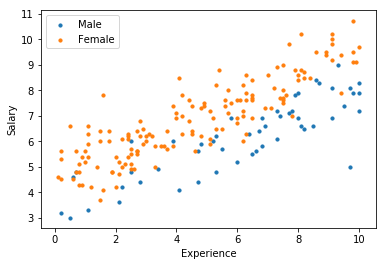

In [5]:
# plots
fig = plt.figure()
plt.scatter(MALE.iloc[:, 2], MALE.iloc[:, 3], s=10, label='Male')
plt.scatter(FEMALE.iloc[:, 2], FEMALE.iloc[:, 3], s=10, label='Female')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
plt.legend()
plt.show()

In [6]:
## 독립변수들
X = data.iloc[:, 1:]
X = X.values.tolist()
X = np.array(X)
#X

# 종속변수 Target = T 
T = data.iloc[:,0]
T = T.values.tolist()
T = np.array(T)
#T

# 회귀계수
beta = np.random.randn(3)
#beta= np.array([1,1,1])
beta

array([-1.70214706,  1.74175009, -1.41088039])

## 회귀식
## $$ a_n=B^TX = \hat{B}_0 +\hat{B}_1x_1 +\hat{B}_2x_2 ,    \quad\mbox{n=데이터 수}$$




In [7]:
# 내적 -> 회귀계수와 X의 선형결합 
a = X.dot(beta)
#a


## $$ \mbox 로그오즈 = 회귀식을\  p에\  대해서\  정리 $$
## $$ log(Odds) = \hat{B}_0 +\hat{B}_1x_1 + \hat{B}_2x_2 $$
## $$ \mbox P는 \ 로지스틱 \ 함수 $$
## $$ P = \frac{\mathrm{1} }{\mathrm{1} + e^{-a_n}} = \sigma(x,B) $$ 

In [8]:
# 로지스틱 함수 odds -> log 후 p에 대해 정리

def logistic(a):
    return 1/(1 + np.exp(-a))

P = logistic(a)
P

array([7.06029062e-04, 5.68033936e-03, 2.97938607e-03, 3.64268191e-02,
       1.21923760e-01, 4.71070804e-01, 6.54366278e-01, 4.97570327e-01,
       8.50785032e-01, 9.82102710e-01, 1.69981826e-03, 8.82138244e-04,
       9.89742125e-01, 1.41831287e-01, 1.80012236e-03, 7.62725258e-01,
       1.01415075e-01, 8.47011621e-02, 3.85213646e-04, 3.30805284e-01,
       2.63884366e-02, 6.35643956e-01, 7.78075325e-02, 1.57122436e-02,
       8.57930323e-01, 4.58957607e-01, 4.39497611e-01, 5.81952010e-03,
       9.67999534e-01, 1.72916138e-02, 5.67236183e-01, 5.01888076e-04,
       7.86487597e-04, 8.40248001e-04, 8.06200513e-01, 9.05553016e-04,
       6.28107537e-03, 1.75924550e-01, 1.59848843e-02, 6.47041517e-02,
       5.80061193e-01, 7.38895914e-03, 7.06029062e-04, 3.91996613e-03,
       2.81881950e-03, 1.95155593e-01, 4.59518282e-02, 6.29549949e-01,
       1.70813326e-04, 7.47608610e-01, 7.38895914e-03, 8.04045828e-01,
       1.69239478e-01, 1.05266590e-02, 1.42898431e-01, 2.95353580e-03,
      

## $$ \mbox 각\  데이터가\  따르는\  확률분포를\   label\  y와\  엮어서\  표현  $$

## $$ P(x_i,y_i | B) = \begin{cases} \sigma(x,B)^{y}, & \mbox{if }y\mbox{ = 1} \\ (1-\sigma(x,B))^{1-y}, & \mbox{if }y\mbox{ = 0} \end{cases} $$

## $$ \mbox 위의 \ 확률분포를 \ 따르는 \   데이터에서 \ 얻은 \ Likelihood  $$

## $$ L = \sigma(x,B)^{y}(1-\sigma(x,B))^{1-y} $$ 

## $$ \mbox log 변환  $$

## $$ L^*=log(L) = y\sigma(x,B) + (1-y)(1-\sigma(x,B)) $$ 

## $$ \mbox Convex\  function으로\  만들기\  위한 \ (-) 곱   $$

## $$ \mbox J는\ Loss\ Function  $$

## $$ J= - L^* $$

## $$ \mbox Loss\ function \ = \ Negative\ log \ likelihood\  $$

## $$ \mbox N개의 \ 데이터에\ 대한\ Negative\ Likelihood  $$
## $$ J(x_i,y_i|B) = -\sum_{i=1}^N y_i\sigma(x_i,B)- \sum_{i=1}^N(1-y_i)(1-\sigma(x_i,B)) $$ 


In [9]:
def Negative_log_likelihood(T, P):
    E = 0
    for i in range(200):  # 200개의 데이터에 대한 Loss
        # y의 레이블이 1이면
 
        E += -1*T[i]*np.log1p(P[i]) + -1*(1-T[i])*np.log1p(1 - P[i])
            
    return E

In [10]:
X.T.dot(T - P)

array([  -5.82023474, -133.87160116, -112.85170956])

## Loss function 에 대한 Gradient를 구하기 위한 작업 

## $$ \mbox J를 \ B에 \ 대해서\ 편미분  $$

## $$ \mbox J는 \ P에 \ 대한\ 함수이고, \ P는 \ a에 \ 대한 \ 함수이고,\ a는\ B에 \ 대한\ 함수  $$

## $${\partial J\over\partial B} =  -\sum_{i=1}^N {\partial J\over\partial P_i} {\partial P_i\over\partial a_i} {\partial a_i\over\partial B} $$ 

## $${\partial J\over\partial P_i} = \frac{y_i}{P_i}- \frac{1-y_i}{1-P_i} ,\quad {\partial P_i\over\partial a_i} = P_i(1-P_i), \quad {\partial a_i\over\partial B}=X^T $$ 

## $$ \mbox 또한 \ B는 \ B_0,\ B_1,\ B_2이\  있어서\ 각각\ 편미분    $$
## $$ \mbox 간단하게 \  표현하면   $$

## $${\partial J\over\partial B} =  -\sum_{i=1}^N {\partial J\over\partial P_i} {\partial P_i\over\partial a_i} {\partial a_i\over\partial B} = - X^T(y-P) =  X^T(P-y)$$ 

In [11]:

learning_rate = 0.05
for i in range(150):
    if i % 10 == 0:
        print ('Loss:',Negative_log_likelihood(T, P))
        print ('beta_hat:',beta)


    # Beta 추정 
    beta -= learning_rate * X.T.dot(P - T)

    # 업데이트 된 beta로 다시 P 계산 
    P = logistic(X.dot(beta))
    P
print ("Final w:", beta)

Loss: -108.40369527127902
beta_hat: [-1.70214706  1.74175009 -1.41088039]
Loss: -38.907303945435814
beta_hat: [ 0.48227738 28.93234779 -3.22875387]
Loss: -102.58578272287205
beta_hat: [ -2.68822097   6.43600357 -50.43599819]
Loss: -104.68307575891004
beta_hat: [  2.52308501  30.79615765 -40.54582831]
Loss: -88.95374310681771
beta_hat: [  7.63381783  42.21823949 -33.03707355]
Loss: -114.76169100770068
beta_hat: [ 11.07548469  33.61588166 -38.52055767]
Loss: -82.76174908253066
beta_hat: [ 16.3706855   40.52905729 -29.67809521]
Loss: -102.58578272287205
beta_hat: [ 16.8987828   16.91074701 -56.19225842]
Loss: -114.58626062556448
beta_hat: [ 23.0397001   33.19008012 -40.89209396]
Loss: -83.21358181708213
beta_hat: [ 28.17811033  41.31106761 -32.01777362]
Loss: -102.58578272287205
beta_hat: [ 28.60889133  17.47617036 -58.48951154]
Loss: -115.02933332407437
beta_hat: [ 34.674169    33.56324245 -43.15085488]
Loss: -83.96407812419402
beta_hat: [ 39.73086199  41.50635294 -34.30293356]
Loss: -10

/Users/sungjinpark/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in exp


In [12]:
P

array([2.50898787e-41, 1.27191421e-19, 1.23130515e-27, 1.17045177e-01,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.17305055e-31, 2.68620693e-40,
       1.00000000e+00, 1.00000000e+00, 8.24700333e-32, 1.00000000e+00,
       9.99999999e-01, 9.99999983e-01, 1.77020628e-48, 1.00000000e+00,
       3.08519413e-06, 1.00000000e+00, 9.99996244e-01, 5.06718965e-10,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 5.18686527e-20,
       1.00000000e+00, 1.40137948e-11, 1.00000000e+00, 1.38128157e-46,
       5.43476265e-40, 1.61527015e-39, 1.00000000e+00, 2.02952729e-38,
       1.20743282e-16, 1.00000000e+00, 9.05602143e-09, 9.99901400e-01,
       1.00000000e+00, 9.92467185e-18, 2.50898787e-41, 7.52518982e-23,
       3.24484934e-25, 1.00000000e+00, 9.99787248e-01, 1.00000000e+00,
       1.12530512e-57, 1.00000000e+00, 9.92467185e-18, 1.00000000e+00,
       1.00000000e+00, 1.73897969e-13, 1.00000000e+00, 2.91259805e-28,
      

/Users/sungjinpark/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


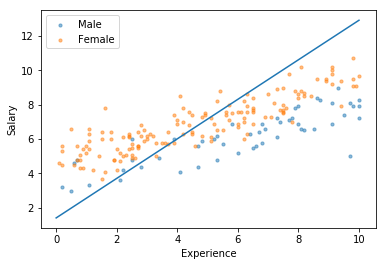

In [13]:
fig = plt.figure()
plt.scatter(MALE.iloc[:, 2], MALE.iloc[:, 3], s=10, label='Male',alpha=0.5)
plt.scatter(FEMALE.iloc[:, 2], FEMALE.iloc[:, 3], s=10, label='Female',alpha=0.5)
#plt.scatter(X[:,1], X[:,2],c=T , s=10, alpha=0.8)
x_axis = np.linspace(0, 10,50)
y_axis = -(beta[0] + x_axis*beta[1]) / beta[2]

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
plt.plot(x_axis, y_axis)
plt.legend()
plt.show()





### 직접 구현을 한 rough한 GD이기 때문에 성능이 안좋을 수 있습니다
### 초기값에 매우 민감하며, 기타 하이퍼 파라미터에 따라 성능이 달라집니다